In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# Read Training Set
train = pd.read_csv('train.csv',parse_dates=['click_time'])

In [76]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [77]:
train['day'] = train['click_time'].dt.day.astype('uint8')
train['hour'] = train['click_time'].dt.hour.astype('uint8')
train['minute'] = train['click_time'].dt.minute.astype('uint8')
train['second'] = train['click_time'].dt.second.astype('uint8')

In [78]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,6,14,32,21
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,6,14,33,34
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,6,14,34,12
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,6,14,34,52
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,6,14,35,8


In [80]:
check_day_6 = train[train['day']==6]
check_day_6.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,6,14,32,21
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,6,14,33,34
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,6,14,34,12
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,6,14,34,52
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,6,14,35,8


In [81]:
check_day_6['minute'] = check_day_6['minute'].apply(lambda x: '{0:0>2}'.format(x))
check_day_6.head()

<ipython-input-81-197258396e47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_day_6['minute'] = check_day_6['minute'].apply(lambda x: '{0:0>2}'.format(x))


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,6,14,32,21
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,6,14,33,34
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,6,14,34,12
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,6,14,34,52
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,6,14,35,8


In [83]:
check_day_6['hour_minute'] = check_day_6['hour'].astype(str) + check_day_6['minute'].astype(str)
check_day_6['hour_minute'] = check_day_6['hour_minute'].astype('int32')
check_day_6.head()

<ipython-input-83-cff3a0629bf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_day_6['hour_minute'] = check_day_6['hour'].astype(str) + check_day_6['minute'].astype(str)
<ipython-input-83-cff3a0629bf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_day_6['hour_minute'] = check_day_6['hour_minute'].astype('int32')


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second,hour_minute
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,6,14,32,21,1432
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,6,14,33,34,1433
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,6,14,34,12,1434
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,6,14,34,52,1434
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,6,14,35,8,1435


In [141]:
ranges = [-1, 14, 29, 44, np.inf]  # np.inf for infinity
labels = ['1', '2', '3', '4']
check_day_6['seconds_15'] = pd.cut(check_day_6['second'], 
                                  bins=ranges, 
                                  labels=labels)
check_day_6['hm_seconds_15'] = check_day_6['hour'].astype(str) + check_day_6['minute'].astype(str) + check_day_6['seconds_15'].astype(str)
check_day_6['hm_seconds_15'] = check_day_6['hm_seconds_15'].astype('int32')

check_day_6.sample(5)

<ipython-input-141-31d7d897284a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_day_6['seconds_15'] = pd.cut(check_day_6['second'],
<ipython-input-141-31d7d897284a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_day_6['hm_seconds_15'] = check_day_6['hour'].astype(str) + check_day_6['minute'].astype(str) + check_day_6['seconds_15'].astype(str)
<ipython-input-141-31d7d897284a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second,hour_minute,seconds_15,hm_seconds_15,seconds_10,hm_seconds_10
1703012,21055,12,1,25,145,2017-11-06 16:40:53,NaN,0,6,16,40,53,1640,4,16404,"[50, 60)","1640[50, 60)"
959971,80248,2,1,6,477,2017-11-06 16:20:56,NaN,0,6,16,20,56,1620,4,16204,"[50, 60)","1620[50, 60)"
3959941,51609,14,1,19,480,2017-11-06 18:27:57,NaN,0,6,18,27,57,1827,4,18274,"[50, 60)","1827[50, 60)"
7108694,148906,12,1,17,178,2017-11-06 23:05:10,NaN,0,6,23,05,10,2305,1,23051,"[10, 20)","2305[10, 20)"
1275894,53454,15,1,18,245,2017-11-06 16:29:03,NaN,0,6,16,29,3,1629,1,16291,"[0, 10)","1629[0, 10)"


In [144]:
ranges = [-1, 9, 19, 29, 39, 49, np.inf]  # np.inf for infinity
labels = ['1', '2', '3', '4', '5', '6']
check_day_6['seconds_10'] = pd.cut(check_day_6['second'], 
                                  bins=ranges, 
                                  labels=labels)
check_day_6['hm_seconds_10'] = check_day_6['hour'].astype(str) + check_day_6['minute'].astype(str) + check_day_6['seconds_10'].astype(str)
check_day_6['hm_seconds_10'] = check_day_6['hm_seconds_10'].astype('int32')

check_day_6.sample(5)

<ipython-input-144-974fd54c7791>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_day_6['seconds_10'] = pd.cut(check_day_6['second'],
<ipython-input-144-974fd54c7791>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_day_6['hm_seconds_10'] = check_day_6['hour'].astype(str) + check_day_6['minute'].astype(str) + check_day_6['seconds_10'].astype(str)
<ipython-input-144-974fd54c7791>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second,hour_minute,seconds_15,hm_seconds_15,seconds_10,hm_seconds_10
6879396,154258,10,1,32,113,2017-11-06 22:57:40,NaN,0,6,22,57,40,2257,3,22573,5,22575
7091301,151547,18,1,19,121,2017-11-06 23:04:38,NaN,0,6,23,04,38,2304,3,23043,4,23044
5019698,203932,8,1,27,145,2017-11-06 20:30:52,NaN,0,6,20,30,52,2030,4,20304,6,20306
2229234,206244,64,1,9,459,2017-11-06 16:57:12,NaN,0,6,16,57,12,1657,1,16571,2,16572
1987971,111025,3,1,13,280,2017-11-06 16:49:27,NaN,0,6,16,49,27,1649,2,16492,3,16493


In [105]:
conversion_minute = check_day_6.groupby(
    'hour_minute'
).aggregate(
    {
        'is_attributed':sum,
        'click_time':"count"
    }
)
conversion_minute['conversion_rate'] = conversion_minute['is_attributed']/conversion_minute['click_time']
conversion_minute.reset_index(level=0, inplace=True)
conversion_minute.head()

,is_attributed,click_time
hour_minute,,
1432,0,1
1433,0,1
1434,0,2
1435,0,1
1436,0,1


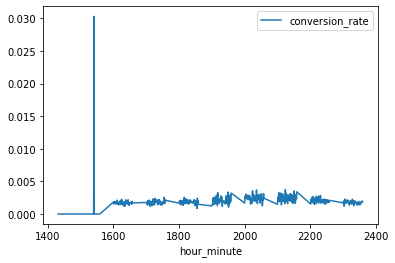

In [108]:
conversion_minute.plot(x ='hour_minute', y='conversion_rate', kind = 'line')
plt.show()

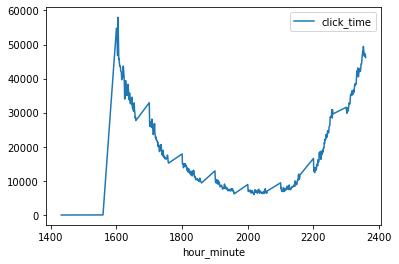

In [107]:
conversion_minute.plot(x ='hour_minute', y='click_time', kind = 'line')
plt.show()

In [63]:
conversion_minute.describe()

,is_attributed,click_time,conversion_rate
count,1436.000000,1436.000000,1436.000000
mean,0.053621,22.557799,0.002217
std,0.234441,10.740921,0.011426
min,0.000000,1.000000,0.000000
25%,0.000000,15.000000,0.000000
50%,0.000000,25.000000,0.000000
75%,0.000000,30.000000,0.000000
max,2.000000,48.000000,0.200000


## Testing 15 Second Interval

In [256]:
conversion_seconds_15 = check_day_6.groupby(
    'hm_seconds_15'
).aggregate(
    {
        'is_attributed':sum,
        'click_time':"count"
    }
)
conversion_seconds_15['conversion_rate'] = conversion_seconds_15['is_attributed']/conversion_seconds_15['click_time']
conversion_seconds_15.reset_index(level=0, inplace=True)
conversion_seconds_15.head()

,hm_seconds_15,is_attributed,click_time,conversion_rate
0,14322,0,1,0.0
1,14333,0,1,0.0
2,14341,0,1,0.0
3,14344,0,1,0.0
4,14351,0,1,0.0


In [257]:
conversion_seconds_15.describe()

,hm_seconds_15,is_attributed,click_time,conversion_rate
count,2075.000000,2075.000000,2075.000000,2075.000000
mean,19450.956145,8.382651,4486.056867,0.001908
std,2527.916702,6.298512,3376.170248,0.002870
min,14322.000000,0.000000,1.000000,0.000000
25%,17307.500000,4.000000,1887.500000,0.001327
50%,19403.000000,7.000000,3235.000000,0.001812
75%,21501.500000,12.000000,7014.500000,0.002376
max,23594.000000,37.000000,16509.000000,0.125000


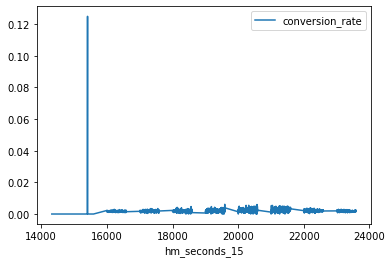

In [258]:
conversion_seconds_15.plot(x ='hm_seconds_15', y='conversion_rate', kind = 'line')
plt.show()

In [259]:
#remove outlier
conversion_seconds_15 = conversion_seconds_15[conversion_seconds_15['conversion_rate']!= 0.125]

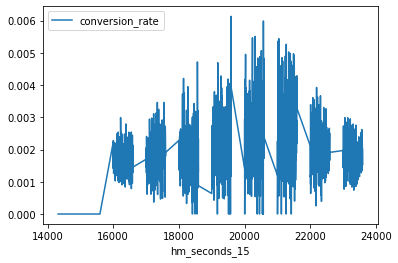

In [260]:
conversion_seconds_15.plot(x ='hm_seconds_15', y='conversion_rate', kind = 'line')
plt.show()

In [261]:
Q1 = conversion_seconds_15.click_time.quantile(0.25)
Q3 = conversion_seconds_15.click_time.quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR
print(threshold)

14718.625


In [262]:
#Fraud if number of clicks > 14718.625
conversion_seconds_15[conversion_seconds_15.click_time > (Q3 + 1.5 * IQR)]

,hm_seconds_15,is_attributed,click_time,conversion_rate
157,16003,22,15596,0.001411
158,16004,37,16213,0.002282
159,16011,25,14894,0.001679
176,16052,24,16509,0.001454


In [264]:
trydf = conversion_seconds_15[conversion_seconds_15['is_attributed']!=0]
trydf['threshold']=trydf['click_time']/trydf['conversion_rate']
trydf.head()

<ipython-input-264-5f21771ddf4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trydf['threshold']=trydf['click_time']/trydf['conversion_rate']


,hm_seconds_15,is_attributed,click_time,conversion_rate,threshold
155,16001,23,10291,0.002235,4.604551e+06
156,16002,18,12720,0.001415,8.988800e+06
157,16003,22,15596,0.001411,1.105615e+07
158,16004,37,16213,0.002282,7.104361e+06
159,16011,25,14894,0.001679,8.873249e+06


## Plot for Checking Threshold - 15 seconds

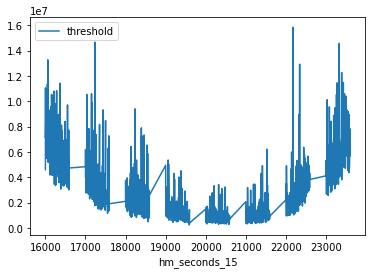

In [265]:
trydf.plot(x ='hm_seconds_15', y='threshold', kind = 'line')
plt.show()

In [206]:
trydf[trydf['threshold']>14000000]

,hm_seconds_15,is_attributed,click_time,conversion_rate,threshold
489,17233,2,5416,0.000369,1.466653e+07
1666,22174,1,3979,0.000251,1.583244e+07
1967,23331,8,10797,0.000741,1.457190e+07


In [209]:
trydf[trydf['is_attributed']==2].click_time.describe()

count     110.000000
mean     2145.081818
std       688.492678
min      1427.000000
25%      1746.250000
50%      1889.000000
75%      2363.000000
max      5416.000000
Name: click_time, dtype: float64

In [210]:
Q1 = trydf.threshold.quantile(0.25)
Q3 = trydf.threshold.quantile(0.75)
IQR = Q3 - Q1
print((Q3 + 1.5 * IQR))

9184991.433333335


In [211]:
trydf[trydf['threshold']>9184991.433333335]

,hm_seconds_15,is_attributed,click_time,conversion_rate,threshold
157,16003,22,15596,0.001411,1.105615e+07
160,16012,17,13476,0.001262,1.068250e+07
165,16023,17,13210,0.001287,1.026495e+07
175,16051,19,14506,0.001310,1.107495e+07
176,16052,24,16509,0.001454,1.135613e+07
178,16054,18,13131,0.001371,9.579064e+06
179,16061,14,13630,0.001027,1.326978e+07
204,16122,13,11019,0.001180,9.339874e+06
213,16143,12,10716,0.001120,9.569388e+06
218,16154,11,10769,0.001021,1.054285e+07


## Output for 15 second interval

In [227]:
co = conversion_seconds_15[conversion_seconds_15['conversion_rate']==0]
Q1 = co.click_time.quantile(0.25)
Q3 = co.click_time.quantile(0.75)
IQR = Q3 - Q1
click_outlier = Q3 + 1.5 * IQR
print(click_outlier)

13.5


In [219]:
len(co)

171

In [228]:
len(co[co['click_time']>13.5])

17

In [229]:
co.click_time.describe()

count     171.000000
mean      201.590643
std       609.074029
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max      2635.000000
Name: click_time, dtype: float64

In [234]:
df = conversion_seconds_15
df.loc[(df['is_attributed'] != 0), 'ratio'] = df['click_time']/df['conversion_rate']

C:\Users\Rhina Arcala\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Rhina Arcala\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [235]:
Q1 = df.ratio.quantile(0.25)
Q3 = df.ratio.quantile(0.75)
IQR = Q3 - Q1
threhold = Q3 + 1.5 * IQR
print(threhold)

9184991.433333335


In [241]:
df.loc[(df['is_attributed'] == 0) & (df['click_time'] > 13.5), 'isFraud'] = 1
df.loc[(df['is_attributed'] != 0) & (df['threshold'] > 9184991.433333335), 'isFraud'] = 1
df.loc[(df['isFraud'].isnull()), 'isFraud'] = 0

C:\Users\Rhina Arcala\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Rhina Arcala\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [242]:
df.sample(5)

,hm_seconds_15,is_attributed,click_time,conversion_rate,isFraud,threshold,ratio
673,18093,6,3294,0.001821,0.0,1.808406e+06,1.808406e+06
30,14533,0,1,0.000000,0.0,NaN,NaN
653,18043,5,3479,0.001437,0.0,2.420688e+06,2.420688e+06
618,17554,13,4619,0.002814,0.0,1.641166e+06,1.641166e+06
519,17311,15,4775,0.003141,0.0,1.520042e+06,1.520042e+06


In [243]:
df.isFraud.sum()/len(df)

0.027965284474445518

In [247]:
new_data = pd.merge(check_day_6, df[['hm_seconds_15', 'isFraud']], on='hm_seconds_15', how='left')
new_data.sample(5)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second,hour_minute,seconds_15,hm_seconds_15,seconds_10,hm_seconds_10,isFraud
5368936,48212,2,1,19,237,2017-11-06 21:20:11,NaN,0,6,21,20,11,2120,1,21201,2,21202,0.0
4695777,30372,20,1,18,259,2017-11-06 19:44:40,NaN,0,6,19,44,40,1944,3,19443,5,19445,0.0
8557887,78420,3,1,8,173,2017-11-06 23:43:51,NaN,0,6,23,43,51,2343,4,23434,6,23436,0.0
4435469,115650,3,1,13,205,2017-11-06 19:12:29,NaN,0,6,19,12,29,1912,2,19122,3,19123,0.0
6741904,4019,3,1,18,115,2017-11-06 22:53:00,NaN,0,6,22,53,0,2253,1,22531,1,22531,0.0


In [248]:
new_data.isFraud.sum()/len(new_data)

0.04750451412075413

## Testing 5 second interval

In [266]:
ranges = [-1, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, np.inf]  # np.inf for infinity
labels = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
check_day_6['seconds_5'] = pd.cut(check_day_6['second'], 
                                  bins=ranges, 
                                  labels=labels)
check_day_6['hm_seconds_5'] = check_day_6['hour'].astype(str) + check_day_6['minute'].astype(str) + check_day_6['seconds_5'].astype(str)
check_day_6['hm_seconds_5'] = check_day_6['hm_seconds_5'].astype('int32')

check_day_6.sample(5)

<ipython-input-266-01d073358179>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_day_6['seconds_5'] = pd.cut(check_day_6['second'],
<ipython-input-266-01d073358179>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_day_6['hm_seconds_5'] = check_day_6['hour'].astype(str) + check_day_6['minute'].astype(str) + check_day_6['seconds_5'].astype(str)
<ipython-input-266-01d073358179>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second,hour_minute,seconds_15,hm_seconds_15,seconds_10,hm_seconds_10,seconds_5,hm_seconds_5
7447514,77081,15,1,19,140,2017-11-06 23:15:27,NaN,0,6,23,15,27,2315,2,23152,3,23153,06,231506
3512707,6313,64,1,8,459,2017-11-06 17:56:18,NaN,0,6,17,56,18,1756,2,17562,2,17562,04,175604
8162247,54688,3,1,13,135,2017-11-06 23:34:26,NaN,0,6,23,34,26,2334,2,23342,3,23343,06,233406
3562404,142964,18,1,41,121,2017-11-06 17:59:23,NaN,0,6,17,59,23,1759,2,17592,3,17593,05,175905
7433351,175837,2,1,37,205,2017-11-06 23:15:04,NaN,0,6,23,15,4,2315,1,23151,1,23151,01,231501


In [273]:
conversion_seconds_5 = check_day_6.groupby(
    'hm_seconds_5'
).aggregate(
    {
        'is_attributed':sum,
        'click_time':"count"
    }
)
conversion_seconds_5['conversion_rate'] = conversion_seconds_5['is_attributed']/conversion_seconds_5['click_time']
conversion_seconds_5.reset_index(level=0, inplace=True)
conversion_seconds_5.head()

,hm_seconds_5,is_attributed,click_time,conversion_rate
0,143205,0,1,0.0
1,143307,0,1,0.0
2,143403,0,1,0.0
3,143411,0,1,0.0
4,143502,0,1,0.0


In [274]:
conversion_seconds_5.describe()

,hm_seconds_5,is_attributed,click_time,conversion_rate
count,6035.000000,6035.000000,6035.000000,6035.000000
mean,195903.722452,2.882187,1542.430489,0.001939
std,24350.679818,2.502211,1112.276037,0.002944
min,143205.000000,0.000000,1.000000,0.000000
25%,174210.500000,1.000000,649.000000,0.000965
50%,194807.000000,2.000000,1129.000000,0.001706
75%,215403.500000,4.000000,2387.500000,0.002696
max,235912.000000,18.000000,6048.000000,0.200000


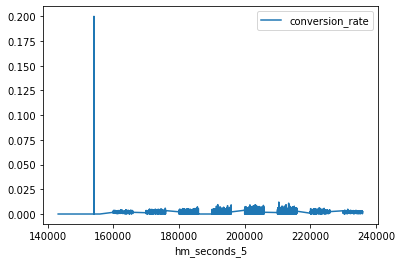

In [275]:
conversion_seconds_5.plot(x ='hm_seconds_5', y='conversion_rate', kind = 'line')
plt.show()

In [276]:
#remove outlier
conversion_seconds_5 = conversion_seconds_5[conversion_seconds_5['conversion_rate']!= 0.2]


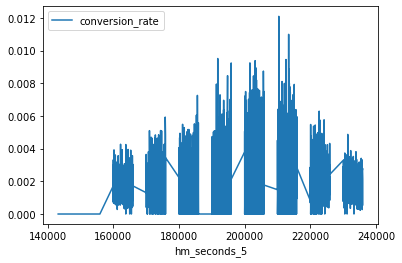

In [278]:
conversion_seconds_5.plot(x ='hm_seconds_5', y='conversion_rate', kind = 'line')
plt.show()

In [279]:
Q1 = conversion_seconds_5.click_time.quantile(0.25)
Q3 = conversion_seconds_5.click_time.quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR
print(threshold)


4997.125


In [280]:
#Fraud if number of clicks > 4997.125
conversion_seconds_5[conversion_seconds_5.click_time > (Q3 + 1.5 * IQR)]


,hm_seconds_5,is_attributed,click_time,conversion_rate
282,160008,8,5438,0.001471
283,160009,4,5532,0.000723
284,160010,18,5597,0.003216
285,160011,12,5423,0.002213
286,160012,7,5193,0.001348
288,160102,6,5050,0.001188
337,160503,10,6048,0.001653
338,160504,14,5653,0.002477
339,160505,5,5591,0.000894
340,160506,5,5265,0.000950


In [281]:
trydf = conversion_seconds_5[conversion_seconds_5['is_attributed']!=0]
trydf['threshold']=trydf['click_time']/trydf['conversion_rate']
trydf.head()

<ipython-input-281-efc3f165bc17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trydf['threshold']=trydf['click_time']/trydf['conversion_rate']


,hm_seconds_5,is_attributed,click_time,conversion_rate,threshold
275,160001,5,2898,0.001725,1.679681e+06
276,160002,6,3773,0.001590,2.372588e+06
277,160003,12,3620,0.003315,1.092033e+06
278,160004,6,4124,0.001455,2.834563e+06
279,160005,5,4245,0.001178,3.604005e+06


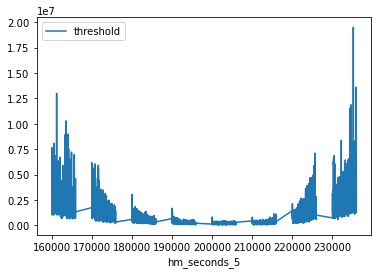

In [282]:
## Plot for Checking Threshold - 5 seconds
trydf.plot(x ='hm_seconds_5', y='threshold', kind = 'line')
plt.show()

In [283]:
Q1 = trydf.threshold.quantile(0.25)
Q3 = trydf.threshold.quantile(0.75)
IQR = Q3 - Q1
print((Q3 + 1.5 * IQR))

3469704.75


In [285]:
trydf[trydf['threshold']>(Q3 + 1.5 * IQR)]

,hm_seconds_5,is_attributed,click_time,conversion_rate,threshold
279,160005,5,4245,0.001178,3.604005e+06
282,160008,8,5438,0.001471,3.696480e+06
283,160009,4,5532,0.000723,7.650756e+06
286,160012,7,5193,0.001348,3.852464e+06
288,160102,6,5050,0.001188,4.250417e+06
...,...,...,...,...,...
6005,235707,4,3890,0.001028,3.783025e+06
6014,235804,1,3690,0.000271,1.361610e+07
6027,235905,3,3673,0.000817,4.496976e+06
6031,235909,4,3969,0.001008,3.938240e+06


## Output for 5 Seconds Interval

In [286]:
co = conversion_seconds_5[conversion_seconds_5['conversion_rate']==0]
Q1 = co.click_time.quantile(0.25)
Q3 = co.click_time.quantile(0.75)
IQR = Q3 - Q1
click_outlier = Q3 + 1.5 * IQR
print(click_outlier)

1887.375


In [287]:
len(co)

974

In [288]:
len(co[co['click_time']>click_outlier])

13

In [289]:
co.click_time.describe()

count     974.000000
mean      569.772074
std       464.654878
min         1.000000
25%         3.000000
50%       603.000000
75%       756.750000
max      3441.000000
Name: click_time, dtype: float64

In [290]:
df = conversion_seconds_5
df.loc[(df['is_attributed'] != 0), 'ratio'] = df['click_time']/df['conversion_rate']


C:\Users\Rhina Arcala\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Rhina Arcala\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [294]:
Q1 = df.ratio.quantile(0.25)
Q3 = df.ratio.quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR
print(threshold)

3469704.75


In [296]:
df.loc[(df['is_attributed'] == 0) & (df['click_time'] > click_outlier), 'isFraud'] = 1
df.loc[(df['is_attributed'] != 0) & (df['ratio'] > threshold), 'isFraud'] = 1
df.loc[(df['isFraud'].isnull()), 'isFraud'] = 0


C:\Users\Rhina Arcala\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Rhina Arcala\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [297]:
df.isFraud.sum()/len(df)

0.04342061650646337

In [298]:
new_data = pd.merge(check_day_6, df[['hm_seconds_5', 'isFraud']], on='hm_seconds_5', how='left')
new_data.sample(5)

new_data.isFraud.sum()/len(new_data)

0.08956060695909403

# ALL DATA

In [ ]:
all_day = train
all_day['minute'] = all_day['minute'].apply(lambda x: '{0:0>2}'.format(x))
all_day['hour_minute'] = all_day['hour'].astype(str) + all_day['minute'].astype(str)
all_day['hour_minute'] = all_day['hour_minute'].astype('int32')
